In [1]:
df_1 = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'Pizza_Sales.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'Pizza_Sales.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_1

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_size,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,499,214,ital_supr_m,1,2015-01-04,13:39:16,17,None,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
1,501,214,spin_pesto_m,1,2015-01-04,13:39:16,17,None,M,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
2,498,214,ital_cpcllo_l,1,2015-01-04,13:39:16,21,None,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
3,497,213,four_cheese_l,1,2015-01-04,13:20:39,18,None,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
4,496,212,ital_cpcllo_l,1,2015-01-04,13:16:03,21,None,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
493,6,2,thai_ckn_l,1,2015-01-01,11:57:40,21,None,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
494,3,2,five_cheese_l,1,2015-01-01,11:57:40,19,None,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
495,4,2,ital_supr_l,1,2015-01-01,11:57:40,21,None,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
496,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16,None,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [2]:
# Getting the top 5 most sold pizza flavors
top_flavors = df_1.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5)

# Convert Series to DataFrame and rename columns
top_flavors_df = top_flavors.reset_index()
top_flavors_df.columns = ["Pizza Name", "Quantity"]

# Display the result
print("The top 5 pizza flavors sold are:\n", top_flavors_df)

The top 5 pizza flavors sold are:
                      Pizza Name  Quantity
0           The Pepperoni Pizza        29
1     The Italian Supreme Pizza        28
2        The Thai Chicken Pizza        27
3    The Barbecue Chicken Pizza        27
4  The California Chicken Pizza        24


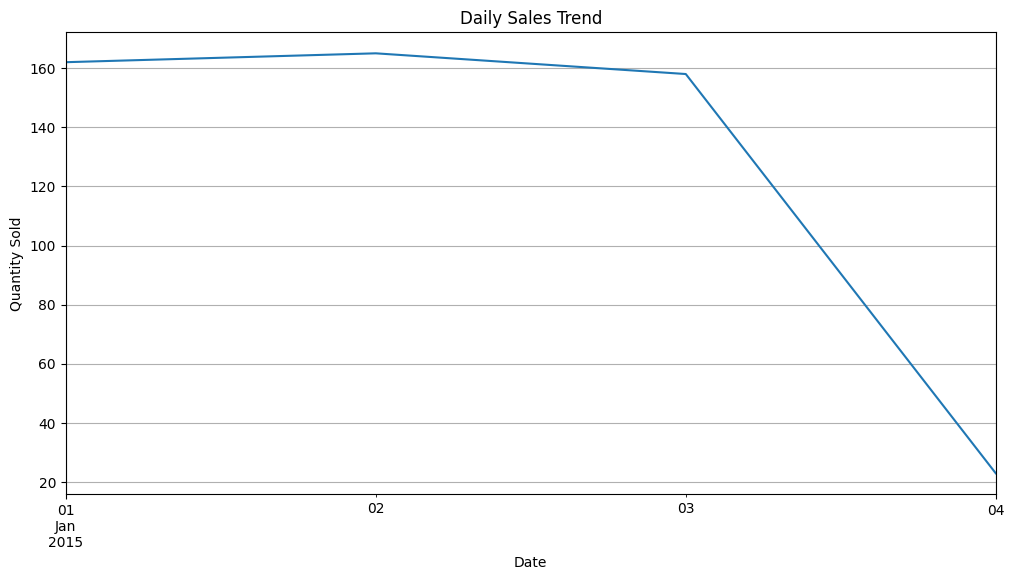

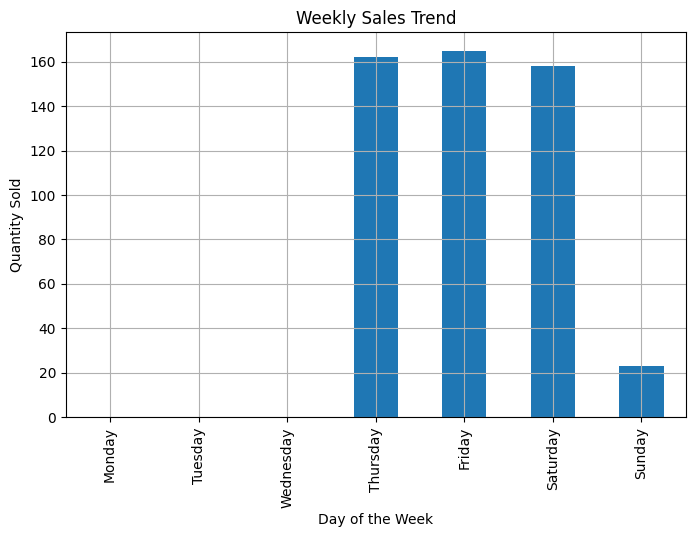

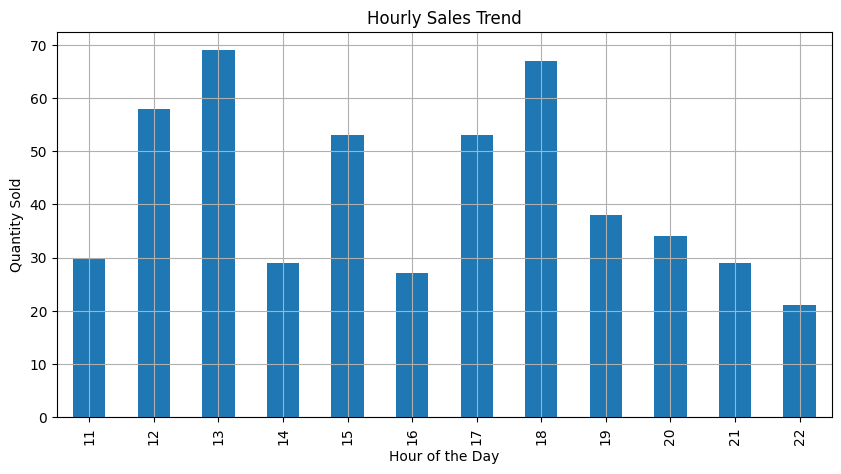

In [3]:
#Sales Over Time: Trends in orders by date, time of day, or day of the week.

import pandas as pd
import matplotlib.pyplot as plt

# Convert order_date and order_time to datetime
df_1['order_date'] = pd.to_datetime(df_1['order_date'])
df_1['order_time'] = pd.to_datetime(df_1['order_time'], format='%H:%M:%S').dt.time

# Extract day of the week and hour of the day
df_1['day_of_week'] = df_1['order_date'].dt.day_name()
df_1['hour_of_day'] = pd.to_datetime(df_1['order_time'], format='%H:%M:%S').apply(lambda x: x.hour)

# Group by date for daily trends
daily_sales = df_1.groupby('order_date')['quantity'].sum()

# Group by day of the week for weekly trends
weekly_sales = df_1.groupby('day_of_week')['quantity'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Group by hour of the day for hourly trends
hourly_sales = df_1.groupby('hour_of_day')['quantity'].sum()

# Plot daily sales trend
plt.figure(figsize=(12, 6))
daily_sales.plot(title='Daily Sales Trend', xlabel='Date', ylabel='Quantity Sold')
plt.grid()
plt.show()

# Plot weekly sales trend
plt.figure(figsize=(8, 5))
weekly_sales.plot(kind='bar', title='Weekly Sales Trend', xlabel='Day of the Week', ylabel='Quantity Sold')
plt.grid()
plt.show()

# Plot hourly sales trend
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', title='Hourly Sales Trend', xlabel='Hour of the Day', ylabel='Quantity Sold')
plt.grid()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=71a909a8-23c1-4fc6-a1c6-5ea9fce86352' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>